# Compute Photosynthetic Parameters

In [2]:
from plantcv import plantcv as pcv
import numpy as np
import os
import warnings
import importlib
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module='plotnine')


In [3]:
pcv.params.debug='plot'

It can be useful to pull up the help pages for a module you'll be using alot like PlantCV. https://plantcv.readthedocs.io

# Read Images

Image id # from experiment:

- Fo_id = '0000'
- Fm_id = '0007'
- FsLss_id = '0084'
- FmpLss_id = '0085'


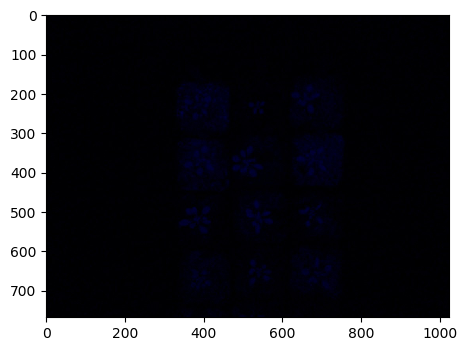

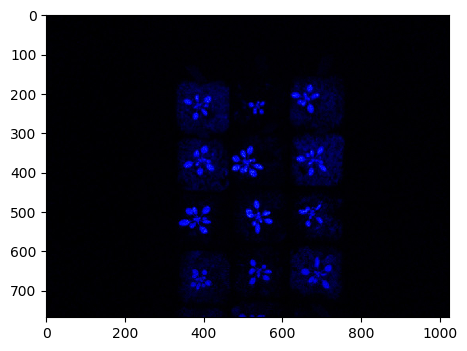

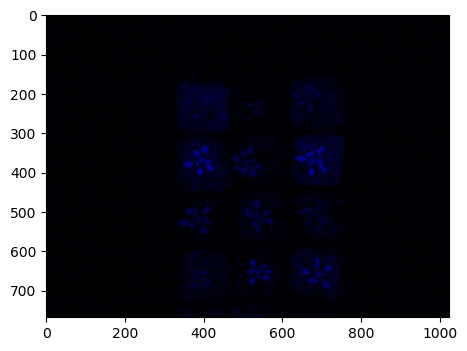

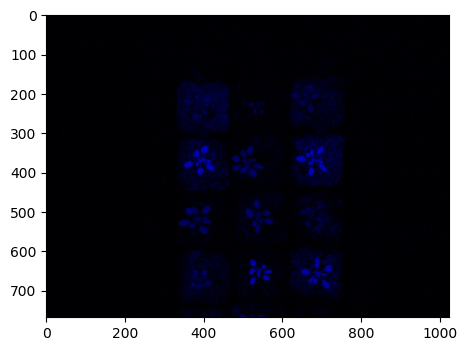

In [4]:
Fo,_,_ = pcv.readimage('data/020320 images/GroupA/2-3-2020_Time_1811_Pos_169x1796_0000.jpg')
Fm,_,_ = pcv.readimage('data/020320 images/GroupA/2-3-2020_Time_1811_Pos_169x1796_0007.jpg')
FsLss,_,_ = pcv.readimage('data/020320 images/GroupA/2-3-2020_Time_1811_Pos_169x1796_0084.jpg')
FmpLss,_,_ = pcv.readimage('data/020320 images/GroupA/2-3-2020_Time_1811_Pos_169x1796_0085.jpg')

# Mask

How can we remove the bottom row of plants which are from the adjacent group?

# Apply Mask and Compute FvFm

In [ ]:
# SInce fvfm is a decimal from 0-1 we need to create a floating point array of 0s. remember Fm is 'uint8' whihc means unsigned 8 bit integer. The only valid values are 0-255
out_flt = np.zeros_like(Fm, dtype='float')

In [ ]:
# fv/fm = (Fm-Fo)/Fm
# we can divide arrays by element using np.divide. 
# np.divide(numerator, denominator, out = background values (use copy to avoid overwriting the original), where = conditions where the calc should occur.)
Fv = np.subtract(Fm,Fo, out=out_flt.copy(), where=finalmask>0)
FvFm = np.divide(Fv,Fm, out=out_flt.copy(), where=np.logical_and(finalmask>0, Fo>0))
fvfm_fig = pcv.visualize.pseudocolor(FvFm,
                        mask=finalmask,
                        cmap='viridis',
                        min_value=0,
                        max_value=1)
fvfm_fig.set_size_inches(6, 6, forward=False)
fvfm_fig.savefig('output/example/example_fvfm.png',
                bbox_inches='tight',
                dpi=150)
fvfm_fig.clf()

Fv/Fm doesn't vary that much in these mutants. You'll need to compute NPQ to determine which plant is which genotype.